In [1]:
'''
Example implementations of HARK.ConsumptionSaving.ConsPortfolioModel
'''
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType, init_portfolio
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle
from HARK.utilities import plot_funcs
from copy import copy
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make and solve an example portfolio choice consumer type
print('Now solving an example portfolio choice problem; this might take a moment...')
MyType = PortfolioConsumerType()
MyType.cycles = 0
t0 = time()
MyType.solve()
t1 = time()
MyType.cFunc = [MyType.solution[t].cFuncAdj for t in range(MyType.T_cycle)]
MyType.ShareFunc = [MyType.solution[t].ShareFuncAdj for t in range(MyType.T_cycle)]
print('Solving an infinite horizon portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving an example portfolio choice problem; this might take a moment...
Solving an infinite horizon portfolio choice problem took 15.041423082351685 seconds.


Consumption function over market resources:


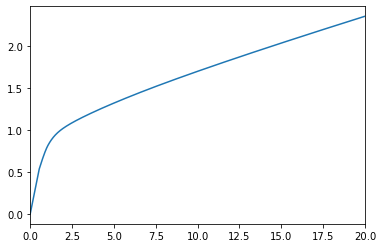

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


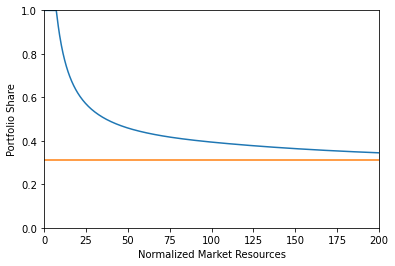

In [3]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources:')
plot_funcs(MyType.cFunc[0], 0., 20.)
print('Risky asset share as a function of market resources:')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from 
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plot_funcs([MyType.ShareFunc[0]
#           ,lambda m: RiskyShareMertSamLogNormal(MyType.RiskPrem,MyType.CRRA,MyType.RiskyVar)*np.ones_like(m)
           ,lambda m: MyType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [4]:
# Now simulate this consumer type
MyType.track_vars = ['cNrm', 'Share', 'aNrm', 't_age']
MyType.T_sim = 100
MyType.initialize_sim()
MyType.simulate()

{'cNrm': array([[1.50746544, 1.00804051, 1.06173514, ..., 1.1337741 , 0.97563921,
         0.89844339],
        [1.40986731, 0.972063  , 1.05755593, ..., 1.05820018, 0.96080905,
         0.92729845],
        [1.40686433, 0.908755  , 1.09607755, ..., 1.09878779, 0.95347089,
         0.948965  ],
        ...,
        [1.18728885, 1.03394204, 1.14514013, ..., 1.02585236, 1.00857822,
         0.9148828 ],
        [1.23573395, 1.0975886 , 1.21507636, ..., 1.08886964, 1.10262934,
         0.95285755],
        [1.22475386, 1.11667582, 1.22554884, ..., 1.12793892, 1.11527911,
         0.99247758]]),
 'Share': array([[0.9929004, 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        ...,
        [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       ,

In [5]:
print('\n\n\n')
print('For derivation of the numerical limiting portfolio share')
print('as market resources approach infinity, see')
print('http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/')





For derivation of the numerical limiting portfolio share
as market resources approach infinity, see
http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/


In [6]:
""
# Make another example type, but this one optimizes risky portfolio share only
# on the discrete grid of values implicitly chosen by RiskyCount, using explicit
# value maximization.
init_discrete_share = init_portfolio.copy()
init_discrete_share['DiscreteShareBool'] = True
init_discrete_share['vFuncBool'] = True # Have to actually construct value function for this to work

In [7]:
# Make and solve a discrete portfolio choice consumer type
print('Now solving a discrete choice portfolio problem; this might take a minute...')
DiscreteType = PortfolioConsumerType(**init_discrete_share)
DiscreteType.cycles = 0
t0 = time()
DiscreteType.solve()
t1 = time()
DiscreteType.cFunc = [DiscreteType.solution[t].cFuncAdj for t in range(DiscreteType.T_cycle)]
DiscreteType.ShareFunc = [DiscreteType.solution[t].ShareFuncAdj for t in range(DiscreteType.T_cycle)]
print('Solving an infinite horizon discrete portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving a discrete choice portfolio problem; this might take a minute...
Solving an infinite horizon discrete portfolio choice problem took 27.92243194580078 seconds.


Consumption function over market resources:


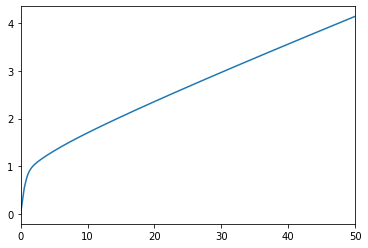

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


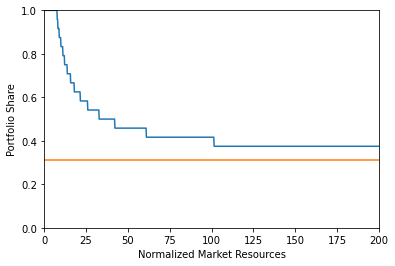

In [8]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources:')
plot_funcs(DiscreteType.cFunc[0], 0., 50.)
print('Risky asset share as a function of market resources:')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from 
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plot_funcs([DiscreteType.ShareFunc[0]
           ,lambda m: DiscreteType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [9]:
print('\n\n\n')

In [10]:
""
# Make another example type, but this one can only update their risky portfolio
# share in any particular period with 15% probability.
init_sticky_share = init_portfolio.copy()
init_sticky_share['AdjustPrb'] = 0.15

In [11]:
# Make and solve a discrete portfolio choice consumer type
print('Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...')
StickyType = PortfolioConsumerType(**init_sticky_share)
StickyType.cycles = 0
t0 = time()
StickyType.solve()
t1 = time()
StickyType.cFuncAdj = [StickyType.solution[t].cFuncAdj for t in range(StickyType.T_cycle)]
StickyType.cFuncFxd = [StickyType.solution[t].cFuncFxd for t in range(StickyType.T_cycle)]
StickyType.ShareFunc = [StickyType.solution[t].ShareFuncAdj for t in range(StickyType.T_cycle)]
print('Solving an infinite horizon sticky portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...
Solving an infinite horizon sticky portfolio choice problem took 35.28818345069885 seconds.


Consumption function over market resources when the agent can adjust his portfolio:


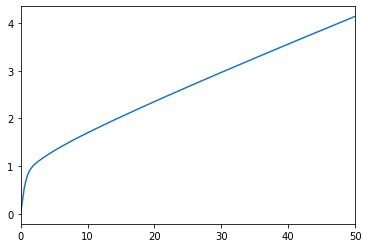

In [12]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources when the agent can adjust his portfolio:')
plot_funcs(StickyType.cFuncAdj[0], 0., 50.)

Consumption function over market resources when the agent CAN'T adjust, by current share:


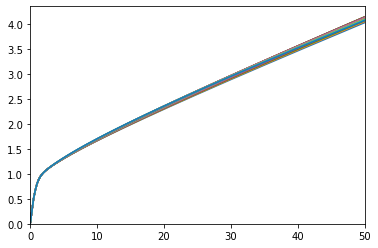

In [13]:
print("Consumption function over market resources when the agent CAN'T adjust, by current share:")
M = np.linspace(0., 50., 200)
for s in np.linspace(0.,1.,21):
    C = StickyType.cFuncFxd[0](M, s*np.ones_like(M))
    plt.plot(M,C)
plt.xlim(0.,50.)
plt.ylim(0.,None)
plt.show()

Risky asset share function over market resources (when possible to adjust):
Optimal (blue) versus Theoretical Limit (orange)


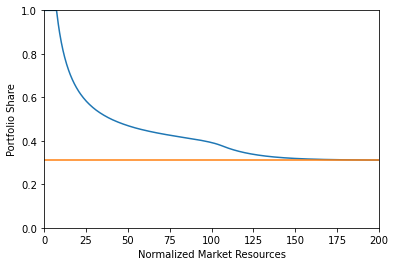

In [14]:
print('Risky asset share function over market resources (when possible to adjust):')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
plot_funcs([StickyType.ShareFunc[0]
           ,lambda m: StickyType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [15]:
""
# Make another example type, but this one has *age-varying* perceptions of risky asset returns.
# Begin by making a lifecycle dictionary, but adjusted for the portfolio choice model.
init_age_varying_risk_perceptions = copy(init_lifecycle)
init_age_varying_risk_perceptions['RiskyCount']      = init_portfolio['RiskyCount']
init_age_varying_risk_perceptions['ShareCount']      = init_portfolio['ShareCount']
init_age_varying_risk_perceptions['aXtraMax']        = init_portfolio['aXtraMax']
init_age_varying_risk_perceptions['aXtraCount']      = init_portfolio['aXtraCount']
init_age_varying_risk_perceptions['aXtraNestFac']    = init_portfolio['aXtraNestFac']
init_age_varying_risk_perceptions['BoroCnstArt']     = init_portfolio['BoroCnstArt']
init_age_varying_risk_perceptions['CRRA']            = init_portfolio['CRRA']
init_age_varying_risk_perceptions['DiscFac']         = init_portfolio['DiscFac']

In [16]:
init_age_varying_risk_perceptions['RiskyAvg']        = [1.08]*init_lifecycle['T_cycle']
init_age_varying_risk_perceptions['RiskyStd']        = list(np.linspace(0.20,0.30,init_lifecycle['T_cycle']))
init_age_varying_risk_perceptions['RiskyAvgTrue']    = 1.08
init_age_varying_risk_perceptions['RiskyStdTrue']    = 0.20
AgeVaryingRiskPercType = PortfolioConsumerType(**init_age_varying_risk_perceptions)
AgeVaryingRiskPercType.cycles = 1

In [17]:
# Solve the agent type with age-varying risk perceptions
#print('Now solving a portfolio choice problem with age-varying risk perceptions...')
t0 = time()
AgeVaryingRiskPercType.solve()
AgeVaryingRiskPercType.cFunc = [AgeVaryingRiskPercType.solution[t].cFuncAdj for t in range(AgeVaryingRiskPercType.T_cycle)]
AgeVaryingRiskPercType.ShareFunc = [AgeVaryingRiskPercType.solution[t].ShareFuncAdj for t in range(AgeVaryingRiskPercType.T_cycle)]
t1 = time()
print('Solving a ' + str(AgeVaryingRiskPercType.T_cycle) + ' period portfolio choice problem with age-varying risk perceptions took ' + str(t1-t0) + ' seconds.')

Solving a 65 period portfolio choice problem with age-varying risk perceptions took 5.694769859313965 seconds.


Consumption function over market resources in each lifecycle period:


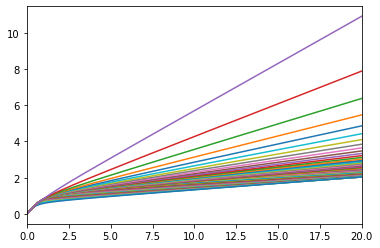

Risky asset share function over market resources in each lifecycle period:


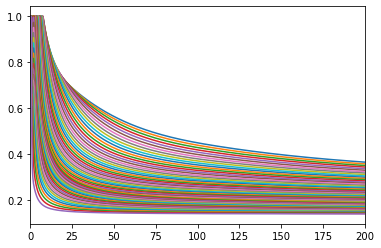

In [18]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources in each lifecycle period:')
plot_funcs(AgeVaryingRiskPercType.cFunc, 0., 20.)
print('Risky asset share function over market resources in each lifecycle period:')
plot_funcs(AgeVaryingRiskPercType.ShareFunc, 0., 200.)

The code below tests the mathematical limits of the model.

In [19]:
# Create a grid of market resources for the plots    
mMin = 0    # Minimum ratio of assets to income to plot
mMax = 5*1e2 # Maximum ratio of assets to income to plot
mPts = 1000 # Number of points to plot 

eevalgrid = np.linspace(0,mMax,mPts) # range of values of assets for the plot

# Number of points that will be used to approximate the risky distribution
risky_count_grid = [5,200]
# Plot by ages (time periods) at which to plot. We will use the default life-cycle calibration.
ages = [2, 4, 6, 8]

#Create a function to compute the Merton-Samuelson limiting portfolio share.
def RiskyShareMertSamLogNormal(RiskPrem,CRRA,RiskyVar):
    return RiskPrem/(CRRA*RiskyVar)

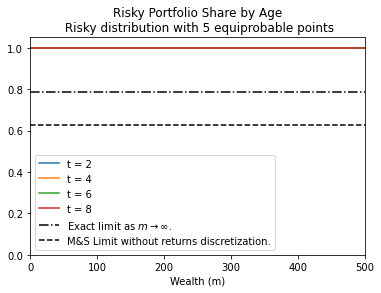

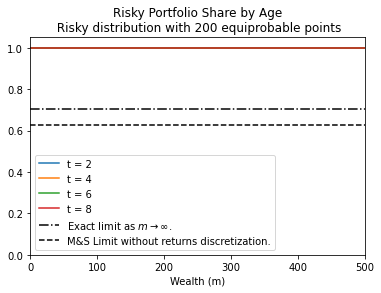

In [20]:
for rcount in risky_count_grid:
    
    # Create a new dictionary and replace the number of points that
    # approximate the risky return distribution
    
    # Create new dictionary copying the default
    merton_dict = init_lifecycle.copy()
    merton_dict['RiskyCount'] = rcount

    # Create and solve agent
    agent = PortfolioConsumerType(**merton_dict)
    agent.solve()

    # Compute the analytical Merton-Samuelson limiting portfolio share
    RiskyVar = agent.RiskyStd**2
    RiskPrem = agent.RiskyAvg - agent.Rfree 
    MS_limit = RiskyShareMertSamLogNormal(RiskPrem,
                                          agent.CRRA,
                                          RiskyVar)
    
    # Now compute the limiting share numerically, using the approximated
    # distribution
    agent.update_ShareLimit()
    NU_limit = agent.ShareLimit
    
    plt.figure()
    for a in ages:
        plt.plot(eevalgrid,
                 agent.solution[a]\
                 .ShareFuncAdj(eevalgrid),
                 label = 't = %i' %(a))
    
    plt.axhline(NU_limit, c='k', ls='-.', label = 'Exact limit as $m\\rightarrow \\infty$.')
    plt.axhline(MS_limit, c='k', ls='--', label = 'M&S Limit without returns discretization.')

    plt.ylim(0,1.05)
    plt.xlim(eevalgrid[0],eevalgrid[-1])
    plt.legend()
    plt.title('Risky Portfolio Share by Age\n Risky distribution with {points} equiprobable points'.format(points = rcount))
    plt.xlabel('Wealth (m)')

    plt.ioff()
    plt.draw()